In [18]:
import numpy as np
import cv2 as cv2
import matplotlib.pyplot as plt
import scipy
import os
print(os.listdir())
plt.style.use('seaborn-v0_8')

['.git', '.gitignore', '.gitmodules', '2_circles.py', 'Ausarbeitung', 'callibrate_circle_test.py', 'COMMANDS.md', 'coords.py', 'cv_example1.py', 'cv_tracking_test.py', 'images', 'LICENSE', 'lumax', 'lumax_demo.py', 'my_canny.ipynb', 'my_hough.ipynb', 'README.md', 'rectangle_detect.py', 'requirements.txt', 'tests', 'tracker.py', '__pycache__']


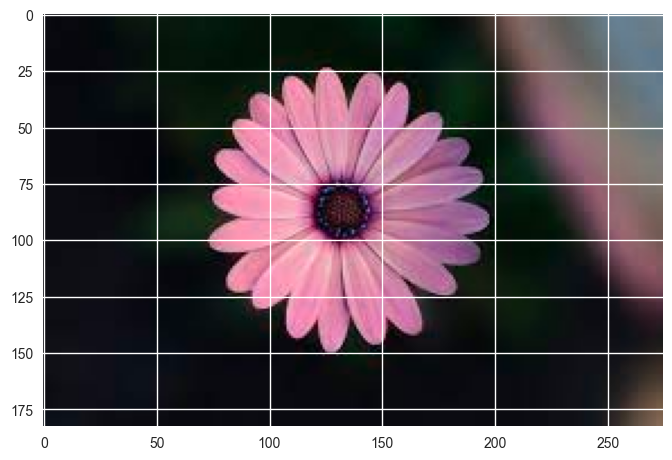

In [20]:
test_img=cv2.imread("images/flower.jpg")
plt.imshow(test_img)
plt.show()

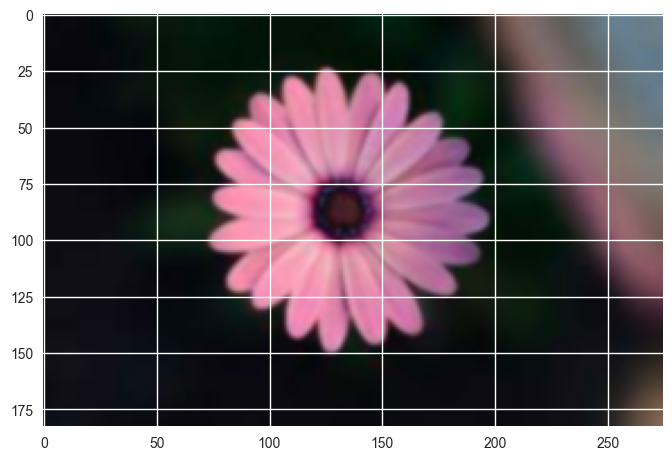

In [21]:
blur_img=cv2.GaussianBlur(test_img,(5,5),1)
plt.imshow(blur_img)
plt.show()

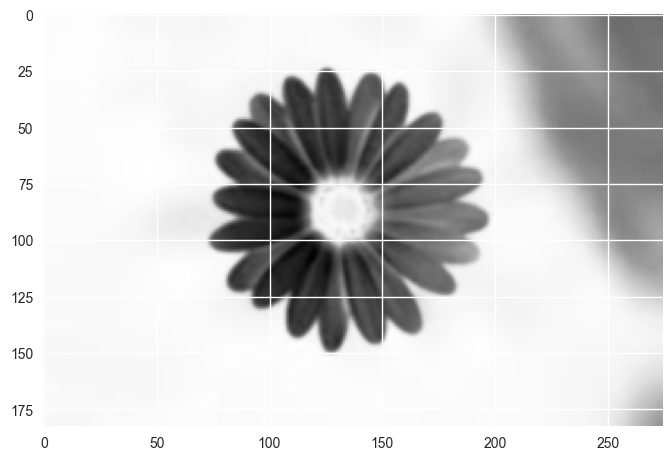

In [22]:
gray_img=cv2.cvtColor(blur_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img)

In [ ]:
sobel_kernel_X=np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
sobel_kernel_y=np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
Gx=scipy.ndimage.filters.convolve(gray_img,sobel_kernel_x)
Gy=scipy.ndimage.filters.convolve(gray_img,sobel_kernel_y)
plt.imshow(Gx)
plt.imshow(Gy)
Plt.show()